# Project 1 - EDA 
#### Mason Reyher, Jamison Cleveland, Kade Aldrich, Mitch Froelich, Ryley Ourada

Initial setup:

In [ ]:
%pip install --upgrade pip -q
%pip install pandas -q
%pip install numpy -q 
%pip install matplotlib -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1

### In a well-written paragraph, answer the following questions about the data:

What was the data used for? </br>
**This data was used in a paper about multi-attribute decision making (Neural nets, trees, etc.) (8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988).** </br>
**It was also used for, "the evaluation
   of HINT (Hierarchy INduction Tool)" (B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997).**

Who (or what organization) uploaded the data?</br>
**Marko Bohanec and Blaz Zupan, June 1997**


How many attributes and how many entities are represented in the data? </br>
**6 Attributes officially; for our purposes, 7, because of the 'class' attribute.** </br>
**The dataset has 1728 instances.**


How many numerical attributes? </br>
**2**


How many categorical attributes? </br>
**5**


Would you suggest that each categorical attribute be label-encoded or one-hot-
encoded? Why? </br>
**All categorical variables should be label encoded, not one-hot encoded. All variables are ranked via quality - for example, the price of a car 'buying' field is given a v-high, high, med, or low value. This is perfect for label-encoding. All other categorical variables assume this pattern as well.**

Are there missing values in the data? If so, what proportion of the data is missing
overall? What proportion of data is missing per attribute (you may use a plot or table to
summarize this information)?
</br>
**There is no missing data.**

Why is this data set interesting to you?
</br>
**ANSWER HERE**


Of the attributes used to describe this data, which do you think are the most
descriptive of the data and why (before doing any data analysis) ?
</br>
**the 'buying' and 'safety' attributes seem to be the most important. Before doing analysis, it would be probable to assume the more safe a car is, the more it would be worth. Most attributes are fairly important for a car (maintenace costs...), so the least important is likely the 'lug_boot' (trunk size) attribute, due to fields like cost and safety being much more important.**

## Part 2

Use Python to write the following functions, without using any functions with the same purpose
in sklearn, pandas, numpy, or any other library (though you may want to use these libraries to
check your answers):

A function that will compute the mean of a numerical, multidimensional data set
input as a 2-dimensional numpy array

In [4]:
# Input needs to be a 2d numpy array
def get_vector_mean(arr):
    return arr.sum(axis=0) / arr.shape[0]

A function that will compute the sample covariance between two attributes that are
input as one-dimensional numpy vectors

In [5]:
def get_cov(attr_1, attr_2):
    attr_1_mean = float(sum(attr_1)) / len(attr_1) 
    attr_2_mean = float(sum(attr_2)) / len(attr_2) 
    sum_of = 0
    for i in range(len(attr_1)):
        sum_of += (float(attr_1[i]) - attr_1_mean) * (float(attr_2[i]) - attr_2_mean)
    sum_of /= len(attr_1) - 1
    return sum_of

def get_var(arr):
    return np.apply_along_axis(lambda x: get_cov(x, x), 0, arr)

A function that will compute the correlation between two attributes that are input as
two numpy vectors.

In [6]:
def get_corr(attr_1, attr_2):
    attr_1_mean = float(sum(attr_1)) / len(attr_1) 
    attr_2_mean = float(sum(attr_2)) / len(attr_2)
    # find standard deviation
    attr_1_dev = 0
    attr_2_dev = 0
    for i in range(len(attr_1)):
        attr_1_dev += (attr_1[i] - attr_1_mean)**2
        attr_2_dev += (attr_2[i] - attr_2_mean)**2
    attr_1_dev = math.sqrt(attr_1_dev / len(attr_1))
    attr_2_dev = math.sqrt(attr_2_dev / len(attr_2))

    # standardize values
    for i in range(len(attr_1)):
        attr_1[i] = (attr_1[i] - attr_1_mean) / attr_1_dev
        attr_2[i] = (attr_2[i] - attr_2_mean) / attr_2_dev
   
    num = 0
    den_x = 0
    den_y = 0
    # calculate numerator and denominators
    for i in range(len(attr_1)):
        num += (float(attr_1[i]) - attr_1_mean) * (float(attr_2[i]) - attr_2_mean)
        den_x += (float(attr_1[i]) - attr_1_mean)**2
        den_y += (float(attr_2[i]) - attr_2_mean)**2
    # calculate full denominator
    den = den_x * den_y
    return num / den

A function that will normalize the attributes in a two-dimensional numpy array using
range normalization.

In [7]:
def get_range_norm(arr):
    max_ = arr.max(0)
    min_ = arr.min(0)
    return (arr - min_) / (max_ - min_)

A function that will normalize the attributes in a two-dimensional numpy array using
standard normalization.

In [8]:
# standard normalization is the z-score normalization
# https://en.wikipedia.org/wiki/Normalization_(statistics)#Examples
# https://en.wikipedia.org/wiki/Standard_score
def get_standard_norm(arr):
    mu = get_vector_mean(arr)
    sigma = np.sqrt(get_var(arr))
    return (arr - mu) / sigma

A function that will compute the covariance matrix of a data set.


In [9]:
def get_cov_matrix(df):
    return np.stack([np.array([get_cov(df[attr1], df[attr2]) for attr2 in df]) for attr1 in df])

A function that will label-encode a two-dimensional categorical data array that is
passed in as input.

In [10]:
def label_encode(attr):
    attr = list(attr)
    key_list = set(attr)
    keys = {}
    count = 0
    for key in key_list:
        keys[key] = count
        count+=1
    for i, val in enumerate(attr):
        attr[i] = keys[val]
    return np.array(attr)

## Part 3

## Questions to Answer:

In [11]:
df_orig = pd.read_csv('wines_red.csv', sep=";")
df_orig.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol', 'quality']

df_orig['quality'] = label_encode(df_orig['quality'])
df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


What is the multivariate mean of the numerical data matrix (where categorical data
have been converted to numerical values)?

In [12]:
df_copy = df_orig.copy()
get_vector_mean(df_copy.to_numpy())

array([ 8.32021277,  0.52771277,  0.27114518,  2.53920526,  0.08747372,
       15.87797247, 46.47559449,  0.99674602,  3.31098874,  0.65821026,
       10.42362328,  2.63642053])

What is the covariance matrix of the numerical data matrix (where categorical data
have been converted to numerical values)?

In [13]:
df_copy2 = df_orig.copy()
get_cov_matrix(df_copy2)

array([[ 3.03278468e+00, -7.98022056e-02,  2.27806519e-01,
         2.81564603e-01,  7.67689351e-03, -2.80548435e+00,
        -6.49358904e+00,  2.19720511e-03, -1.83586059e-01,
         5.39873566e-02, -1.15082258e-01,  1.74166322e-01],
       [-7.98022056e-02,  3.20638792e-02, -1.92544548e-02,
         5.53409651e-04,  5.18147424e-04, -1.91599941e-02,
         4.52052785e-01,  7.33469204e-06,  6.47730985e-03,
        -7.91580557e-03, -3.85140306e-02, -5.64426318e-02],
       [ 2.27806519e-01, -1.92544548e-02,  3.79252375e-02,
         3.93505037e-02,  1.86794809e-03, -1.25157602e-01,
         2.25723019e-01,  1.34437435e-04, -1.62740197e-02,
         1.03175174e-02,  2.26557729e-02,  3.55262057e-02],
       [ 2.81564603e-01,  5.53409651e-04,  3.93505037e-02,
         1.98888622e+00,  3.68789707e-03,  2.75838762e+00,
         9.41734753e+00,  9.46424449e-04, -1.85763584e-02,
         1.28248405e-03,  6.28490930e-02,  1.53902655e-02],
       [ 7.67689351e-03,  5.18147424e-04,  1.8679480

Choose 5 pairs of attributes that you think could be related. Create scatter plots of
all 5 pairs and include these in your report, along with a description and analysis that
summarizes why these pairs of attributes might be related, and how the scatter plots do or
do not support this intuition.

Which range-normalized numerical attributes have the greatest sample covariance?

In [14]:
df_range_normalized = pd.DataFrame(get_range_norm(df_orig.to_numpy()), columns=df_orig.columns)
covar_matrix = get_cov_matrix(df_range_normalized)

# set diagonals to -inf so we only get max of off-diagonals
np.fill_diagonal(covar_matrix, -math.inf)

# take the flat index to the array,
# get the indicies for each attribute,
# then return the labels for each attribute
covar_flat_idx = covar_matrix.argmax()
covar_shape_idx = np.unravel_index(covar_flat_idx, df_range_normalized.shape)
[covar_label1, covar_label2] = [df_range_normalized.columns[i] for i in covar_shape_idx]
covar_label1, covar_label2

('fixed acidity', 'citric acid')

What is their sample covariance? Create a scatter plot of these range-normalized attributes.

In [15]:
covar_matrix[covar_shape_idx]

0.020159868926709814

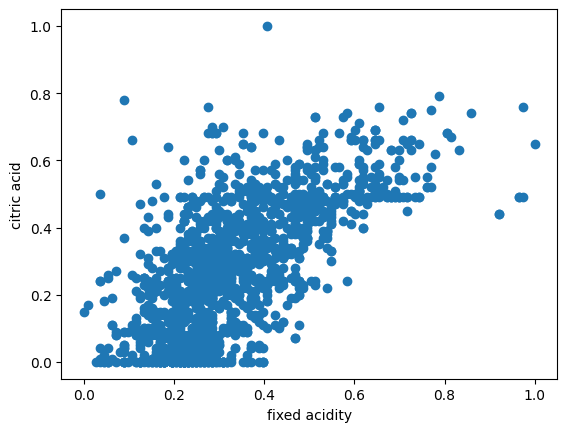

In [16]:
x = df_range_normalized[covar_label1]
y = df_range_normalized[covar_label2]
plt.xlabel(covar_label1)
plt.ylabel(covar_label2)
plt.scatter(x, y)

Which Z-score-normalized numerical attributes have the greatest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [17]:
df_standard_normalized = pd.DataFrame(data=get_standard_norm(df_orig.to_numpy()), columns=df_orig.columns)
df_standard_normalized.to_numpy()

# same thing as the covariance, just with correlation
# correlation matrix is just covariance matrix of the z-score-normalized data
corr_matrix = get_cov_matrix(df_standard_normalized)
np.fill_diagonal(corr_matrix, -math.inf)

corr_flat_idx = corr_matrix.argmax()
corr_shape_idx = np.unravel_index(corr_flat_idx, df_standard_normalized.shape)
[corr_label1, corr_label2] = [df_standard_normalized.columns[i] for i in corr_shape_idx]

corr_label1, corr_label2

('fixed acidity', 'citric acid')

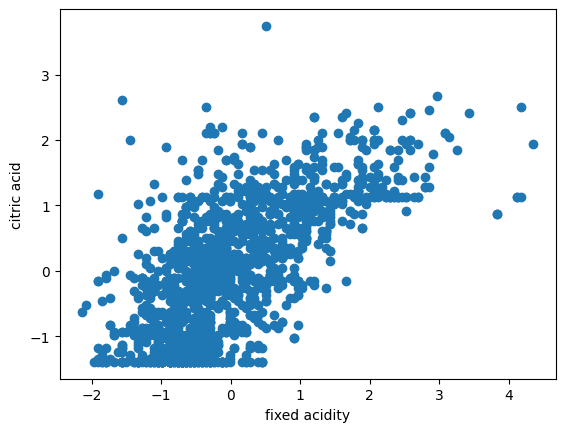

In [18]:
x = df_standard_normalized[corr_label1]
y = df_standard_normalized[corr_label2]
plt.xlabel(corr_label1)
plt.ylabel(corr_label2)
plt.scatter(x, y)

Which Z-score-normalized numerical attributes have the smallest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [19]:
np.fill_diagonal(corr_matrix, math.inf)
corr_flat_idx = corr_matrix.argmin()
corr_shape_idx = np.unravel_index(corr_flat_idx, df_standard_normalized.shape)
[corr_label3, corr_label4] = [df_standard_normalized.columns[i] for i in corr_shape_idx]

(corr_label3, corr_label4)

('fixed acidity', 'pH')

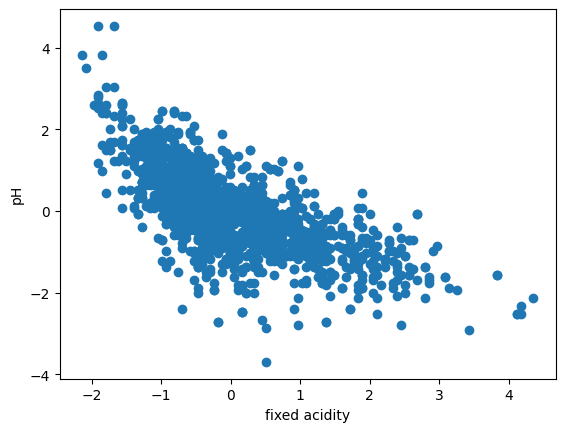

In [20]:
x = df_standard_normalized[corr_label3]
y = df_standard_normalized[corr_label4]
plt.xlabel(corr_label3)
plt.ylabel(corr_label4)
plt.scatter(x, y)

How many pairs of features have correlation greater than or equal to 0.5?


In [ ]:
df_copy = df_orig.copy()
columns = df_copy.columns
column_check = {x : False for x in columns}
for column_1 in columns:
    for column_2 in columns:
        if column_1 == column_2 or not column_check[column_2]:
            continue
        # reset df because I don't understand references
        df_copy = df_orig.copy()
        print(f'Columns -> {column_1} - {column_2} -> correlation: {get_corr(df_copy[column_1], df_copy[column_2])}')
    column_check[column_1] = True

**No pairs of features have a correlation of >= 0.5.**

How many pairs of features have negative sample covariance?


What is the total variance of the data?


In [ ]:
def get_total_var(arr) :
    mean = get_vector_mean(arr)
    for i in arr:
        arr[i] = arr[i] - mean
    sum_sqdiff = arr.sum()
    var = sum_sqdiff / arr.size
    return var
df_copy3 = df_orig.copy()
get_total_var(df_copy3.to_numpy())

What is the total variance of the data, restricted to the five features that have the
greatest sample variance?